In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import soundfile as sf
from IPython.display import Audio, display
from scipy import signal as sig


In [3]:
def plot_fft(signal, signal2, samplerate):
    plt.figure(figsize=(6,2))
    
    # Plot frequency response (in dB).
    signal = np.abs(np.fft.fft(signal))[:len(signal)//2]
    plt.plot(np.linspace(0, samplerate//2, len(signal)),  signal)

    signal2 = np.abs(np.fft.fft(signal2))[:len(signal2)//2]
    plt.plot(np.linspace(0, samplerate//2, len(signal)),  0-signal2)
    
    plt.xlabel('Normalized frequency')
    plt.ylabel('Gain [dB]')
    #plt.ylim([-100, 10])
    plt.grid()
    plt.show()

In [4]:
def normalize(signal):

    highest = 0
    for i in range(len(signal)):
        if np.abs(signal[i]) > highest:
            highest = np.abs(signal[i])
    
    return signal / highest

In [5]:
# here i make a white noise to measure real responce against
w_noise, samplerate = sf.read('noise.wav')
w_noise = normalize(w_noise)
#samplerate=41000

#w_noise = np.random.rand(samplerate) *2 - 1


In [6]:

def conv(signal, A, B):
    
    B /= A[0]
    print('b, {}'.format(B))
    M = len(B)
    Q = len(A)
    
    output = np.full(len(signal), 0.0)
    
    for N in range(M, len(signal)):

        output[N] = B[0] * signal[N]
        
        for K in range(1, M):

            feedback = (a[K] * output[N-K])
            
            output[N] += (B[K] * signal[N - K]) - feedback


        #output[N] /= a[0]

    print(output[:10])
    return output




[   1.           -8.68400634   34.30936932  -81.17670116  127.33014222
 -138.3102781   105.33821866  -55.53172797   19.38977899   -4.04864564
    0.3838523 ]
[2.21685574e-09 2.21685574e-08 9.97585085e-08 2.66022689e-07
 4.65539706e-07 5.58647647e-07 4.65539706e-07 2.66022689e-07
 9.97585085e-08 2.21685574e-08 2.21685574e-09]


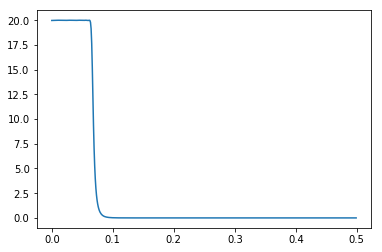

b, [2.21685574e-09 2.21685574e-08 9.97585085e-08 2.66022689e-07
 4.65539706e-07 5.58647647e-07 4.65539706e-07 2.66022689e-07
 9.97585085e-08 2.21685574e-08 2.21685574e-09]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


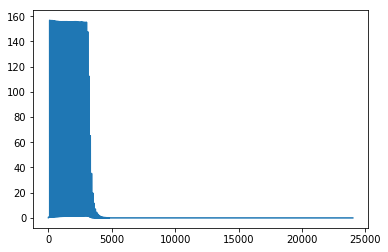

In [8]:
#get coeficiants from chebychev

b, a = sig.cheby1(10, .01, 3000, 'low', fs=samplerate)
#sos = sig.cheby1(10, .01, 2000, fs=samplerate, output='sos')
#b, a = sig.butter(3, 2000, 'high', fs=samplerate)
#sos = sig.butter(15, .2, 10000, fs=samplerate, output = 'sos')

#b, a = sig.ellip(10, .1, 100, 10000, 'high', fs=samplerate)



print(a)
print(b)
#print(sos)

w, h = sig.freqz(b, a)
plt.plot(w/np.pi/2, 20 * np.abs(h))
plt.show()
#a= a / 1000
out = w_noise
out = conv(w_noise, a, b)
#out = sig.sosfilt(sos, w_noise)
#out = sig.lfilter(b, a, w_noise)

#plt.plot(np.linspace(0, samplerate//2, len(out)//2), abs(np.fft.fft(np.fft.fft(out))[:len(out)//2]))
#plt.plot(out)
plt.plot(abs(np.fft.fft(out)[:samplerate//2]))
plt.show()